#### 1. Import pandas library

In [36]:
import pandas as pd

#### 2. Import users table:

In [37]:
df_users = pd.read_csv('users_table.csv')
# df_users.head()

#### 3. Rename Id column to userId

In [38]:
df_users = df.rename(columns={'Id': 'userId'})
# df_users.head()

#### 4. Import posts table:

In [39]:
df_posts = pd.read_csv('posts_table.csv')
# df_posts.head()
# df_posts.describe()

#### 5. Rename Id column to postId and OwnerUserId to userId

In [40]:
df_posts = df_posts.rename(columns={'Id': 'postId', 'OwnerUserId': 'userId'})
# df_posts.head()

#### 6. Define new dataframes for users and posts with the following selected columns:
    **users columns**: userId, Reputation,Views,UpVotes,DownVotes
    **posts columns**: postId, Score,userId,ViewCount,CommentCount

In [48]:
user_cols_to_delete = [i for i in list(df_users.columns) if i not in ['userId','Reputation','Views','UpVotes','DownVotes']]
posts_cols_to_delete = [i for i in list(df_posts.columns) if i not in ['postId','Score','userId','ViewCount','CommentCount']]

df_users_simple = df_users.drop(user_cols_to_delete, axis=1)
df_posts_simple = df_posts.drop(posts_cols_to_delete, axis=1)

In [49]:
print(df_users_simple.head())
print(df_posts_simple.head())

   userId  Reputation  Views  UpVotes  DownVotes
0      -1           1      0     5007       1920
1       2         101     25        3          0
2       3         101     22       19          0
3       4         101     11        0          0
4       5        6792   1145      662          5
   postId  Score  ViewCount  userId  CommentCount
0       1     23     1278.0     8.0             1
1       2     22     8198.0    24.0             1
2       3     54     3613.0    18.0             4
3       4     13     5224.0    23.0             2
4       5     81        NaN    23.0             3


#### 7. Merge both dataframes, users and posts. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [92]:
df_merged = df_users_simple.merge(df_posts_simple)
df_merged.describe()

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
count,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,15390.000000,38962.000000
mean,6079.063087,7281.091679,1400.648016,914.799677,43.841050,22960.799651,4.083081,1196.225991,2.014630
std,5224.896435,15164.527714,3423.886887,2296.527060,161.797079,13696.932471,6.561843,3742.952815,2.674018
min,-1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-19.000000,14.000000,0.000000
25%,1317.000000,147.000000,16.000000,4.000000,0.000000,11325.250000,1.000000,173.000000,0.000000
50%,4856.000000,909.000000,124.000000,65.000000,1.000000,22373.500000,2.000000,385.000000,1.000000
75%,9651.000000,7931.000000,1050.000000,582.000000,16.000000,33688.500000,5.000000,967.000000,3.000000
max,55226.000000,87393.000000,20932.000000,11442.000000,1920.000000,48325.000000,192.000000,175495.000000,45.000000


#### 8. How many missing values do you have in your merged dataframe? On which columns?

In [67]:
print(len(df_merged['postId']) == len(df_merged['postId'].drop_duplicates()))
# So the merge looks sucessuful since all posts are unique, (but users not).

print(len(df_merged))
null_cols = df_merged.isnull().sum()
null_cols
#nulls are in view count. they are 23572 and that is quite a lot given that the len is 38962

True
38962


userId              0
Reputation          0
Views               0
UpVotes             0
DownVotes           0
postId              0
Score               0
ViewCount       23572
CommentCount        0
dtype: int64

#### 9. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before passing to the next step

In [112]:
#[Step 1]
#Describing the dataset.
df_merged.describe()

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
count,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,38962.000000,15390.000000,38962.000000
mean,6079.063087,7281.091679,1400.648016,914.799677,43.841050,22960.799651,4.083081,1196.225991,2.014630
std,5224.896435,15164.527714,3423.886887,2296.527060,161.797079,13696.932471,6.561843,3742.952815,2.674018
min,-1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-19.000000,14.000000,0.000000
25%,1317.000000,147.000000,16.000000,4.000000,0.000000,11325.250000,1.000000,173.000000,0.000000
50%,4856.000000,909.000000,124.000000,65.000000,1.000000,22373.500000,2.000000,385.000000,1.000000
75%,9651.000000,7931.000000,1050.000000,582.000000,16.000000,33688.500000,5.000000,967.000000,3.000000
max,55226.000000,87393.000000,20932.000000,11442.000000,1920.000000,48325.000000,192.000000,175495.000000,45.000000


In [111]:
df_merged.dtypes
# ViewCount has different type despite being likely the same sort of variable as the others.
# After checking int cannot have NaN.

userId            int64
Reputation        int64
Views             int64
UpVotes           int64
DownVotes         int64
postId            int64
Score             int64
ViewCount       float64
CommentCount      int64
dtype: object

There are: 0 NaN in 'CommentCount'
There are: 14983 0-Value in 'CommentCount'


<AxesSubplot:>

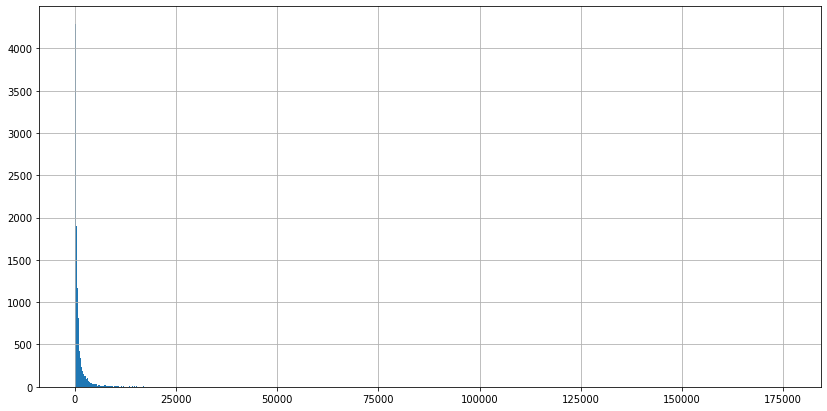

In [107]:
# [Step 2] - Trying to check for other possible error source.
# Here below we try to check if  were posts without views but with comment count higher than zero.
print("There are: " + str(sum(df_merged['CommentCount'].isna())) + " NaN in 'CommentCount'")
print("There are: " + str(sum(df_merged['CommentCount'] == 0)) + " 0-Value in 'CommentCount'")
[sum(df_merged['CommentCount'].isna() & df_merged['CommentCount'] != 0)]
# But there are not, which makes real world sense.

# [Step 3] - Checking the plausibility of substituting them by zeros.
from matplotlib import pyplot as plt
plt.figure(figsize=(14,7))
df_merged['ViewCount'].hist(bins=1000)  
# One sees here that the distrubtion is very dense at the begining, so low values are very common.
# The graph is large because of outliers, but that is not the matter for the this question.

In [114]:
# [Step 4] - More closely looking at the left tail of our distribution.
for i in range(100):
    print(str(i) + " - " + str(sum(list(df_merged['ViewCount'] == i))))
# Note that there are zeros as expected, but also there are no lower values at all.
# This is possible, but not sure if it is plausible.

# [Step 4] - Conclusion: 
# Given that the error seems to stem from simply a difference of type in the original data source.
# It is very likely that substituing the NaN by zero is the correct choice.
# As such I would do that with the following command.

df_merged_noNaN = df_merged.fillna(0)
    #df_merged_noNaN.head()

# There are NaN values on view count. While zero is an plausible value for the views of these posts, given that
# there are no posts in the database with less than 14 view count, I would not feel confortable with just replacing them
# without looking further to the source of the data.
# If I still had to present something based on this not knowing anything else,
# I would probably drop them. Do the analysis and add a footnote about this.
# The drop command would be: 

0 - 0
1 - 0
2 - 0
3 - 0
4 - 0
5 - 0
6 - 0
7 - 0
8 - 0
9 - 0
10 - 0
11 - 0
12 - 0
13 - 0
14 - 1
15 - 1
16 - 0
17 - 3
18 - 1
19 - 3
20 - 2
21 - 8
22 - 1
23 - 7
24 - 7
25 - 3
26 - 7
27 - 1
28 - 4
29 - 7
30 - 7
31 - 11
32 - 7
33 - 5
34 - 10
35 - 9
36 - 12
37 - 7
38 - 15
39 - 10
40 - 10
41 - 8
42 - 18
43 - 9
44 - 20
45 - 12
46 - 10
47 - 23
48 - 22
49 - 19
50 - 18
51 - 15
52 - 26
53 - 19
54 - 19
55 - 27
56 - 16
57 - 19
58 - 18
59 - 23
60 - 29
61 - 18
62 - 22
63 - 19
64 - 26
65 - 30
66 - 24
67 - 27
68 - 20
69 - 18
70 - 28
71 - 27
72 - 27
73 - 27
74 - 26
75 - 27
76 - 28
77 - 39
78 - 31
79 - 33
80 - 28
81 - 27
82 - 32
83 - 26
84 - 36
85 - 27
86 - 33
87 - 32
88 - 39
89 - 27
90 - 28
91 - 25
92 - 33
93 - 26
94 - 28
95 - 32
96 - 22
97 - 28
98 - 43
99 - 31


,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
38957,False,False,False,False,False,False,False,False,False
38958,False,False,False,False,False,False,False,False,False
38959,False,False,False,False,False,False,False,False,False
38960,False,False,False,False,False,False,False,False,False


#### 10. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [119]:
df_merged_noNaN['ViewCount'] = df_merged_noNaN['ViewCount'].astype('int')
df_merged_noNaN.dtypes

userId          int64
Reputation      int64
Views           int64
UpVotes         int64
DownVotes       int64
postId          int64
Score           int64
ViewCount       int32
CommentCount    int64
dtype: object